# Juan Pablo Moncada Restrepo
# Tratamiento de Señales 3

## DIAGNOSTICO DE CANCER DE MAMA UTILIZANDO TECNICAS DE INTELIGENCIA COMPUTACIONAL

## Preguntas a resolver
- ¿Es posible determinar a tiempo el diagnostico de una masa cancerigena?
- ¿Que caracteristicas son fundamentales a la hora de determinar el diagnostico de una masa cancerigena?
- ¿Como un algoritmo de inteligencia artificial puede ser de ayuda en el tratamiento de un paciente con cancer de mama?
    
    
## Descripción del problema 
- La enfermedad del cancer ha sido un problema de salud bastante complicado, tanto en su diagnostico como en su tratamiento       en cualquier momento de la historia, por lo que un diagnostico a una etapa temprana puede ser crucial para el futuro de un       paciente lo cual puede decidir la vida de este mismo, por lo cual mediante la ayuda de tecnicas de inteligencia artificial       se busca generar un Pre-diagnostico a una etapa muy temprana, la cual puede ser crucial y que sirva de apoyo al    profesional   de la salud para el tratamiendo o no de un paciente en especifico, de manera que se pueda determinar si la masa cencerigena     que presenta un paciente corresponde a un cancer benigno o a un cancer maligno y asi poder brindarle al paciente un           tratamiento adecuado para tener mayor probabilidad de salvar la vida del paciente si este llegase a presentar un cancer maligno.

 Para lo cual se busca desarollar una herramenta eficaz, que sirva de apoyo al especialista de la salud, haciendo uso de unos historicos del departamento medico de wisconsin que se tienen de masas cancerigenas la cual corresponde a la base de datos, que servira de ayuda para poder determinar en un futuro un pre-diagnostico de nuevas masas cancerigenas.
 
## Posibles fuentes de información 
- A hybrid approach based on decision trees and clustering for breast cancer classification; Hind Elouedi, Walid Meliani, Zied Elouedi, Nahla Ben Amor; publicadon en 2014 6th International Conference of Soft Computing and Pattern Recognition (SoCPaR), del año 2014 https://ieeexplore.ieee.org/abstract/document/7008010/authors#authors

- An expert system for detection of breast cancer based on association rules and neural network; Murat Karabatak, M. Cevdet Ince; https://www.sciencedirect.com/science/article/abs/pii/S0957417408001103#!

- WBCD breast cancer database classification applying artificial metaplasticity neural network, A. Marcano-Cedeño, J. Quintanilla-Domíngez, D. Andina; del año 2011 https://www.sciencedirect.com/science/article/abs/pii/S0957417411002004#!

- Sánchez Anzola, N. (2015). Máquinas de soporte vectorial y redes neuronales artificiales en la predicción del movimiento USD/COP spot intradiario. ODEON, 9, pp. 113-172. DOI: http://dx.doi.org/10.18601/17941113.n9.04.

- AM Bagirov, B Ferguson, S Ivkovic(2003) "New algorithms for multi-class cancer diagnosis using tumor gene expression signatures",Oxford Univ Press.

## Estado del arte

-  WBCD breast cancer database classification applying artificial metaplasticity neural network, A. Marcano-Cedeño, J. Quintanilla-Domíngez, D. Andina; del año 2011 https://www.sciencedirect.com/science/article/abs/pii/S0957417411002004#!

- AM Bagirov, B Ferguson, S Ivkovic(2003) "New algorithms for multi-class cancer diagnosis using tumor gene expression signatures",Oxford Univ Press.
 
 - Sánchez Anzola, N. (2015). Máquinas de soporte vectorial y redes neuronales artificiales en la predicción del movimiento USD/COP spot intradiario. ODEON, 9, pp. 113-172. DOI: http://dx.doi.org/10.18601/17941113.n9.04.

## DIAGNOSTICO DE CANCER DE MAMA UTILIANTO TECNICAS DE INTELIGENCIA COMPUTACIONAL.
- Desarrollo del analisis de componentes los cuales puedan dictar un pre-diagnistico a cerca de masa cancerigenas presentadas en la mama, tando la extracción de caracteristicas, la reduccion de dimensiones y el algoritmo de aprendizaje se realizará en lenguaje de programacion Python ya que es un lenguaje que cuenta con muchas librerias y herramientas especializadas en el campo de Machine Learning

# IMPORTE DE LIBRERIAS

In [60]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from random import sample
from mpl_toolkits.mplot3d import axes3d
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
base_entrenamiento=pd.read_csv("wdbc.csv")
base_entrenamiento

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Base de Datos
- La base de datos consta de un archivo .csv la cual contiene la informacion a procesar, esta cuenta con 30 caracteristicas a utilizar en el aprendizaje del algoritmo, una columna de ID el cual tenian los pacientes ademas de que cuenta con la columna de llegada la cual es el diagnostico(Maligno o benigno) este cuenta con el 63% de los registros con una calificacion B(benigno) y un 37% restante con una calificacion M(maligno0)

## Analisis Estadistico y Limpieza de Datos

#### BOXPLOT
- En el analisis de datos la herraminta boxplot para el analisis de esta es una herramienta utilizada para conocer como cada una de las caracteristicas se relacionan con la variable de llegada, y poder hacer una primera reducción en base a este primer analisis

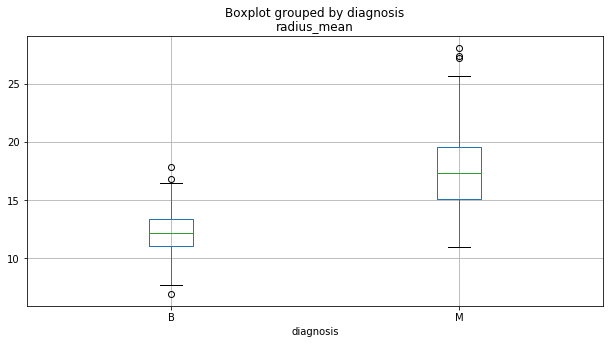

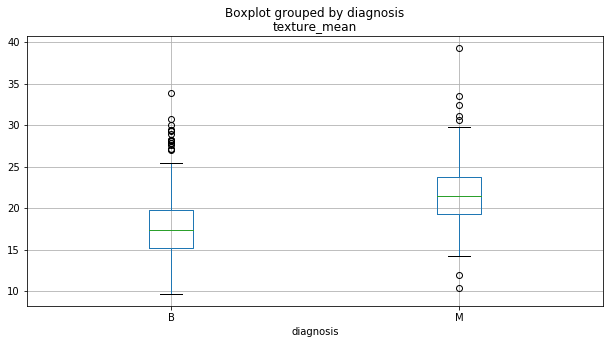

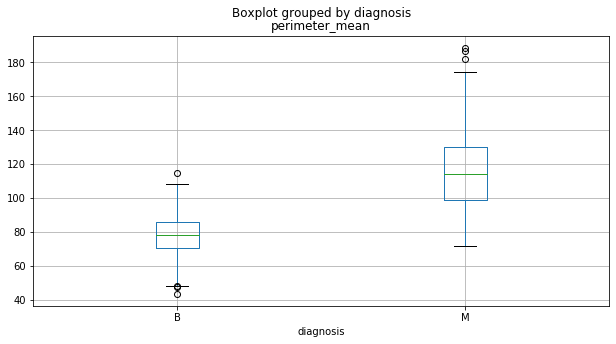

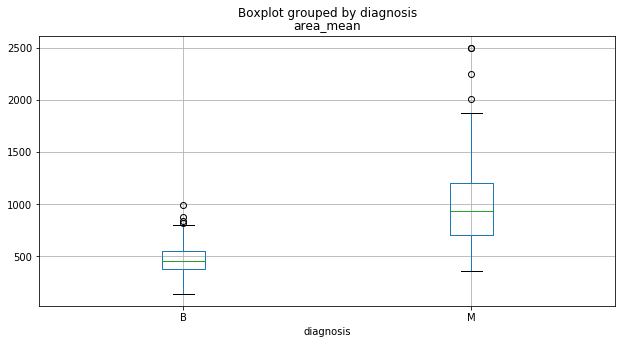

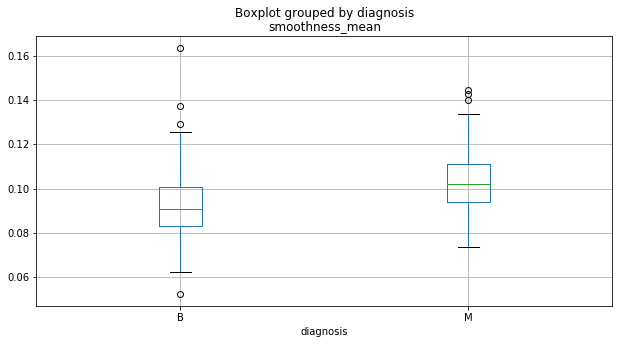

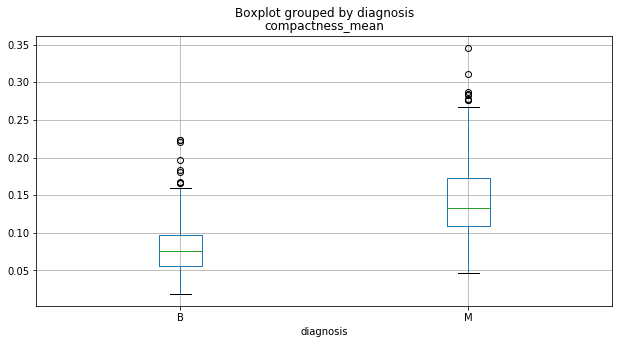

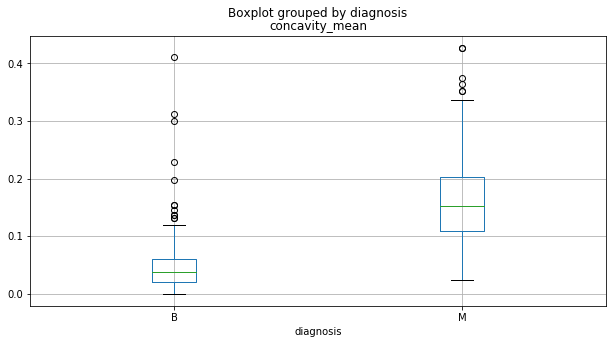

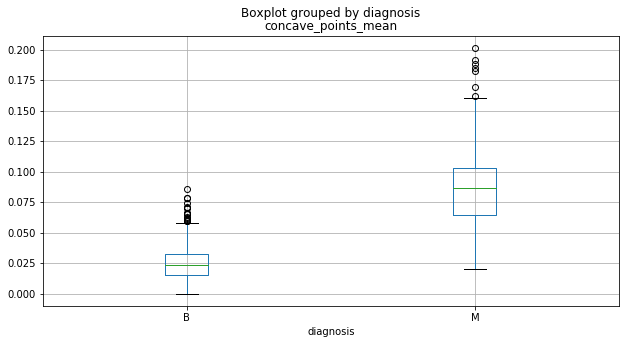

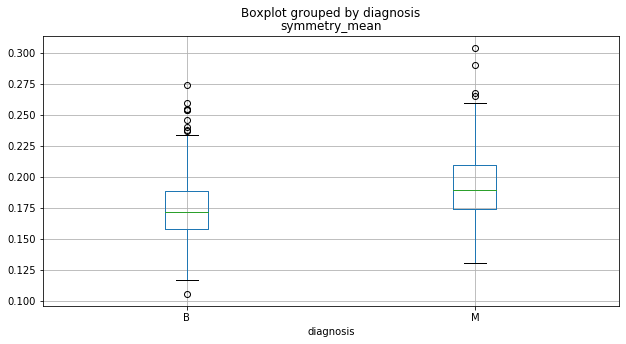

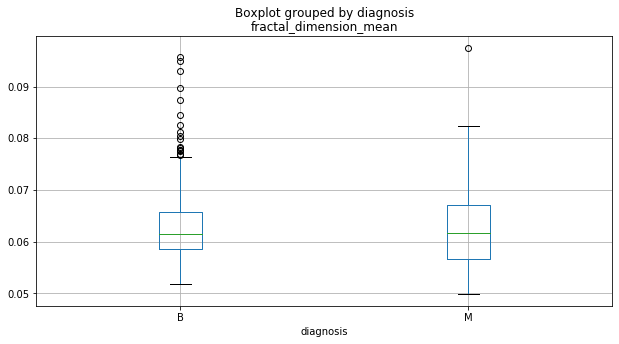

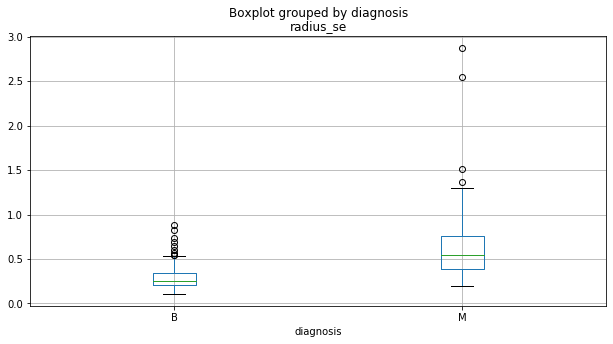

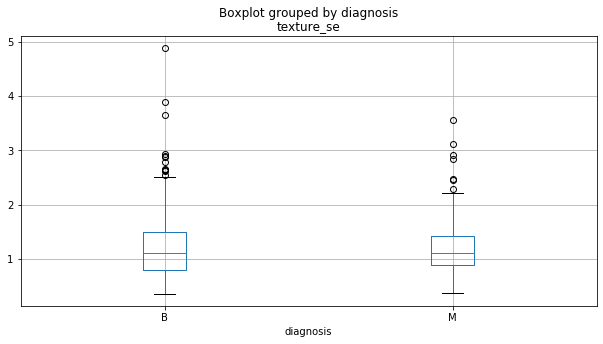

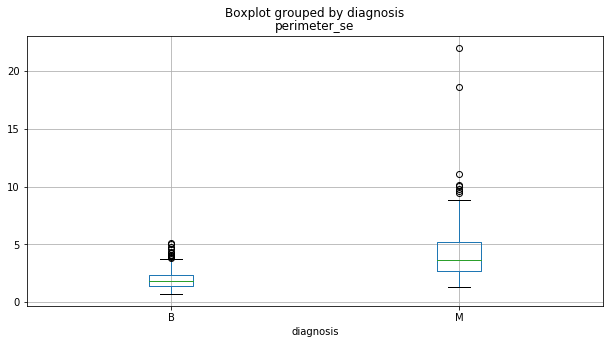

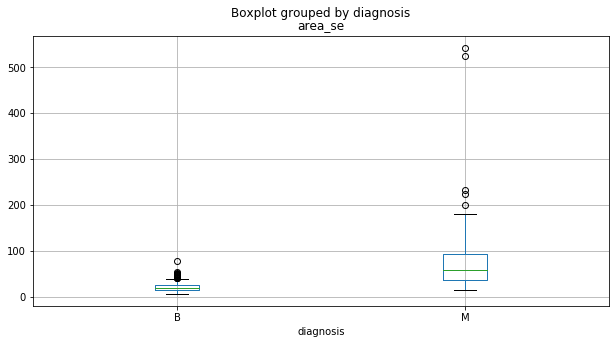

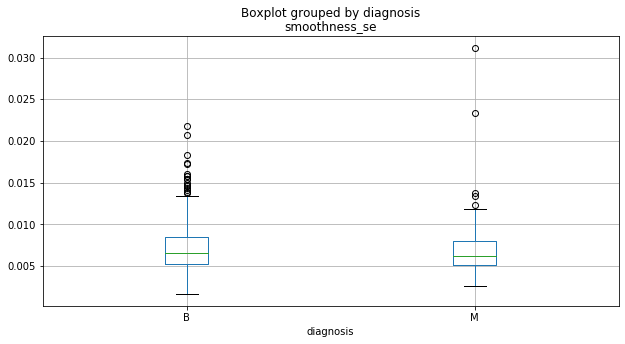

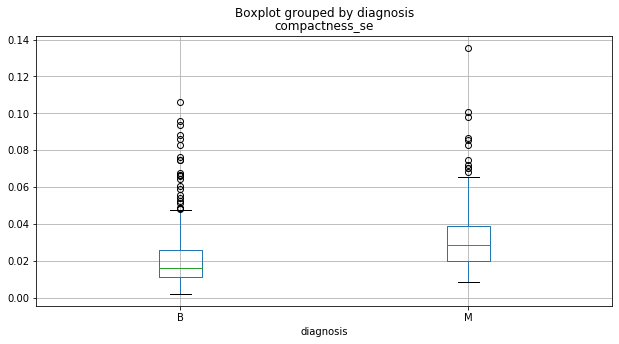

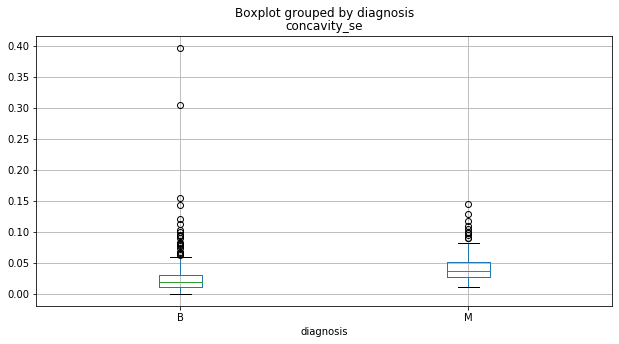

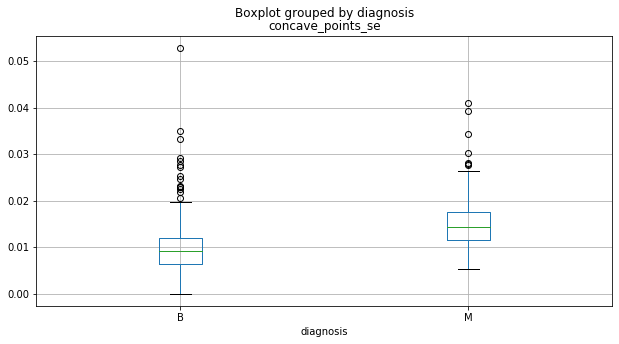

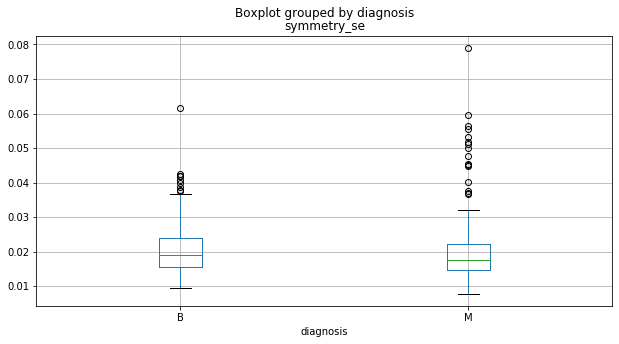

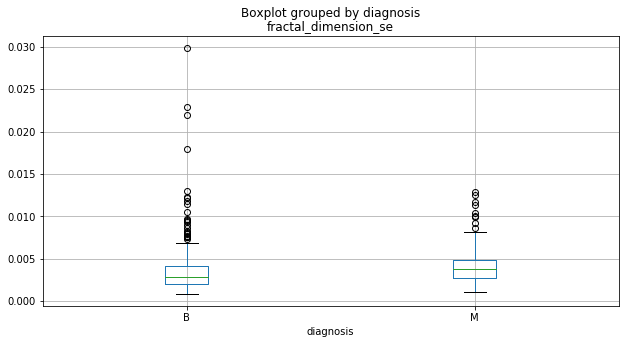

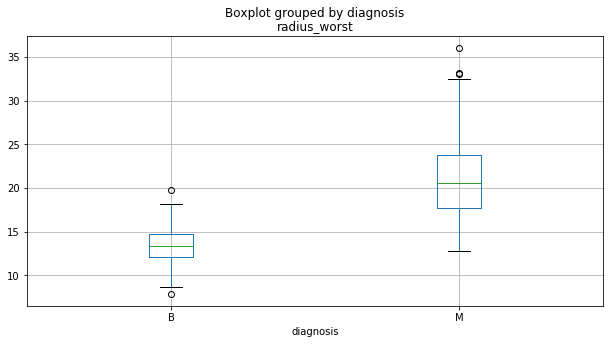

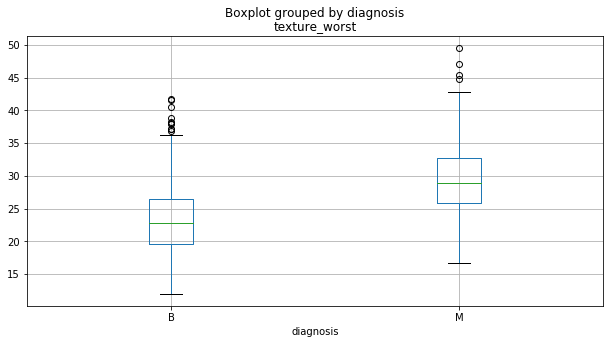

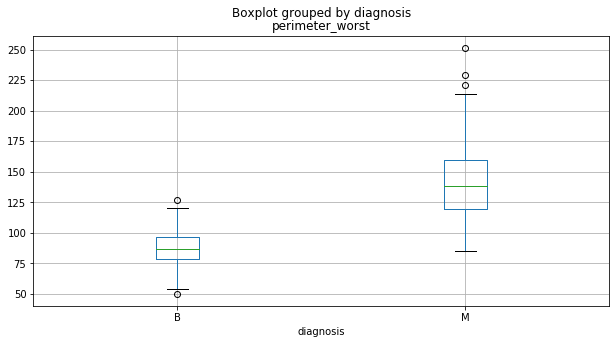

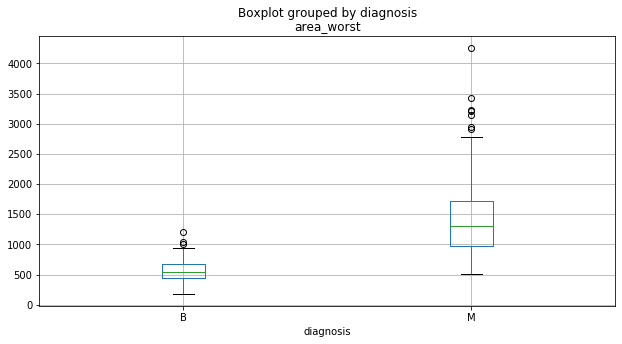

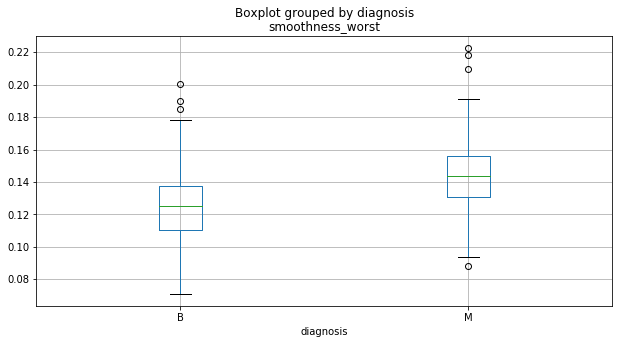

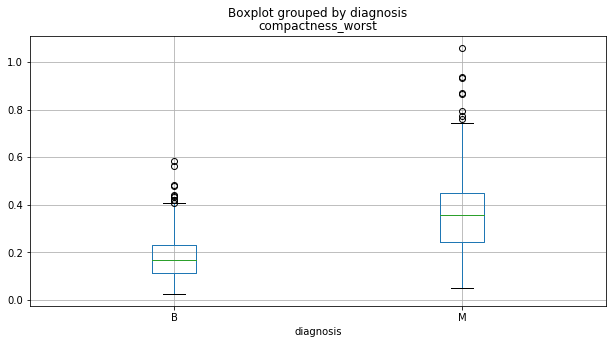

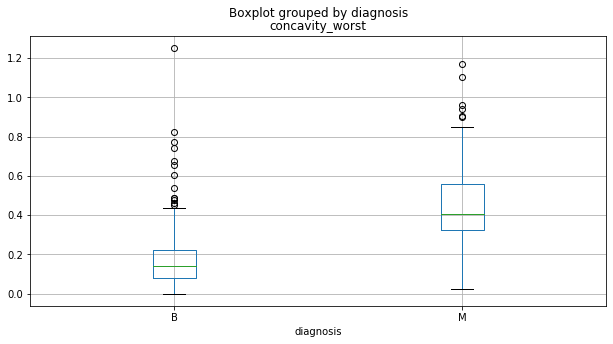

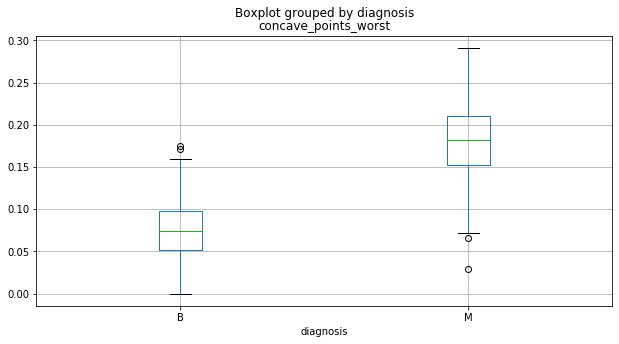

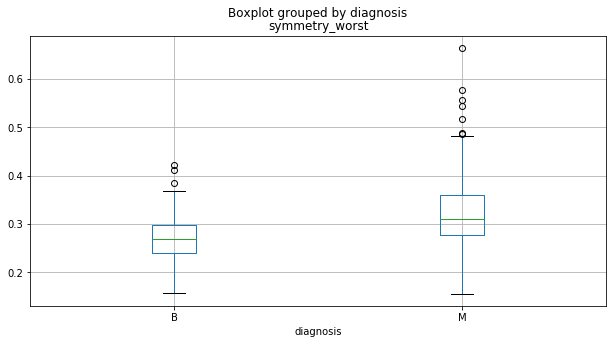

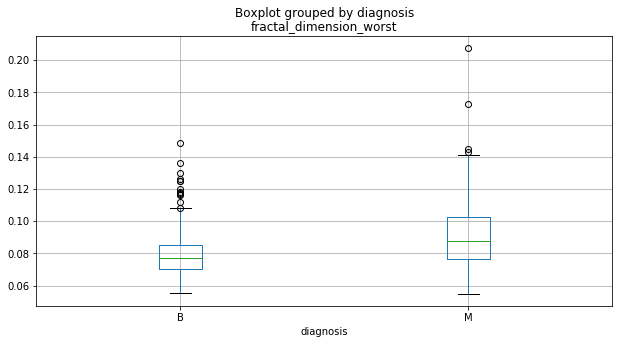

In [3]:
#BOXPLOT de cada caracteristica con la variable diagnosis
for i in ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']:
    boxplot = base_entrenamiento.boxplot(column=i, by='diagnosis', fontsize=10,figsize=(10,5),)
    plt.show()

En estos diagramas se puede ver como pueden estar distribuidos los datos de las diferentes caracteristicas como lo son la media, los cuartiles y valores mayor y menor, y los "o" que estan representados corresponde a valores atipicos que se presentan dentro de la caracteristica graficada.

Por lo cual este grafico nos ayuda a determinar si dentro de una misma caracterista puede servir para aportar información al problema, este tendiendo diferencias los dos boxplot de la misma caracteristica.

Para este problema se logra ver como las caracteristicas **Fractal_dimension_mean**, **Texture_se**, **Smoothness_se**, **Symmetry_se** y **fractal_dimension_se** se pueden descartar dado su poco aporte de información para determinar la naturaleza del problema 

- Primer filtrado de la base
despues de la eliminación de estas 5 caracteristicas en la base de datos, esta queda con el mismo numero de registros y ahora cuenta con 25 caracteristicas 

##### Importe de la base filtrada

In [4]:
base_entrenamiento_filtrada=pd.read_csv("wdbc_filtrada.csv")
base_entrenamiento_filtrada

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


###  Coeficiente de Correlación
Otra forma de encontrar las variables más relevantes de los datos es utilizando los coeficientes de correlación lineal, donde los valores cercanos a **"+1"** o **"-1"** son variables que tienden a relacionarse y valores que tiendan a **"0"** son variables que no son relacionables entre si linealmente.

### - Coeficientes de correlación lineal de variables

In [5]:
# Coeficientes de correlación lineal de cada variable
correlacion_base_entrenamiento_filtrada=base_entrenamiento_filtrada.corr()
correlacion_base_entrenamiento_filtrada.style.background_gradient(cmap='coolwarm')

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave_points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
ID,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,0.143048,0.137331,0.177742,0.033961,0.055239,0.078768,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.679090,0.674172,0.735864,0.206000,0.194204,0.376169,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,0.275869,0.281673,0.259845,0.191975,0.143293,0.163851,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.691765,0.693135,0.744983,0.250744,0.228082,0.407217,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.732562,0.726628,0.800086,0.212583,0.207660,0.372320,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.301467,0.296092,0.246552,0.318943,0.248396,0.380676,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.497473,0.548905,0.455653,0.738722,0.570517,0.642262,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.631925,0.660391,0.617427,0.670279,0.691270,0.683260,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave_points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.698050,0.710650,0.690299,0.490424,0.439167,0.615634,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.303379,0.313893,0.223970,0.421659,0.342627,0.393298,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


Como se puede apreciar en la tabla anterior **Correlación lineal de variables**, se tiene dos gamas de colores
- **Rojo:** Donde la asociación de variables tiende a ser más fuerte.
- **Azul:** Donde la asociación de variables tiende a ser más débil.

### - Matriz de Correlación
Otra manera de poder vizualizar la correlación lineal que pueda existir en las caracteristicas de entrada es la matriz de correlacino que me muestra en un mapa como estan distribuidas estas correlaciónes y si una caracteristica esta fuertemente relacionada con otra poder omitirla y restarle costo computacional a la maquina a la hora de realizar el algoritmo de aprendizaje

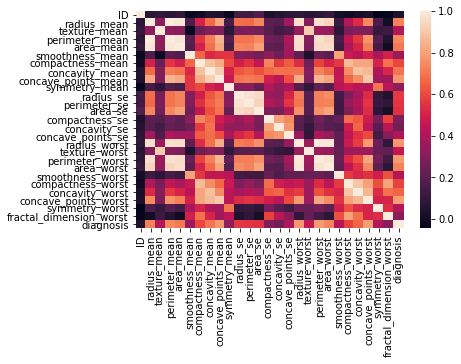

In [6]:
corr = base_entrenamiento_filtrada.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)

Para este caso de estudio en especifico no es recomendable realizar una reduccion en esta etapa dado el resultado en el mapa de calor, que aunque muestra que ciertas caracteristicas estan relacionadas con otras no muestra un patron o una region en la cual se pueda realizar la reducción 

### Normalización de la base de datos
Se realiza una normalización a la base de datos utilizando la  siguiente formula
$ X' = (X - Xmin)/(Xmax - Xmin) $
Carcteristica de Scaling

In [7]:
df1 = base_entrenamiento_filtrada

for i in ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','radius_se','perimeter_se','area_se','compactness_se','concavity_se','concave_points_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']:
    df1[i] = (df1[i]-df1[i].min())/(df1[i].max()-df1[i].min())
    
  
df1.to_csv('wdbc_filtrada_normalizada.csv')
df1

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,842517,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,84300903,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,84348301,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,84358402,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1
565,926682,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1
566,926954,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1
567,927241,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,1


El proceso de normalización de la base de datos es uno de los procesos mas importantes que este tiene antes de realizar cualquier algoritmo ya que este paso le quita cualquier prioridad sobre otra debido a sus dimensiones y garantiza que el entrenamiento y la prueba no se vayan a ver afectados por la dimensión de estos datos que puedan tener grandes valores.

# EXTRACCION DE CARACTERISTICAS(REDUCCION DE DIMENSIONES)

In [8]:
X=df1.iloc[:,1:26] ## Corresponde a las caracteristicas sin la variable de llegada diagnosis
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.385479,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.236828,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.124896,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.222524,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [45]:
y=df1.iloc[:,26:27]
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


Para el paso anterior de realizo una codificacion de la siguiente manera 0 = B(Benigno) y 1 = M(Maligno)

###  PCA
Se decidió utilizar PCA porque se desea tener una perspectiva diferente de los datos y reducir su dimensionalidad para facilitar el análisis al algoritmo de machine-learning a implementar y el número de componentes principales seran 3. 

In [46]:
# PCA con 40 componentes
pca = decomposition.PCA(n_components=3)
X = pca.fit_transform(X)

en la grafia anterior se muestra como al final de la reduccion quedaron representados todos los datos de la base de datos filtrada en 3 componentes

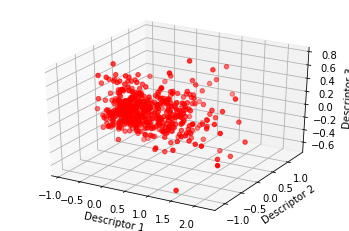

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 =X[:,0]
y1 =X[:,1]
z1 =X[:,2]

ax.scatter(x1, y1, z1, c='r', marker='o')

ax.set_xlabel('Descriptor 1')
ax.set_ylabel('Descriptor 2')
ax.set_zlabel('Descriptor 3')

plt.show()

# SEPARACION DE LA BASE DE DATOS

La separacion de la base de datos es un proceos fundamental en cualquier algoritmo de Machine learnign, la cual consiste en lograr una generalizacion de los datos en todas sus instancias y las etapas que este manes por lo que se buscan hacer una generalizacion de los datos en tres diferentes etapas, una primera etapa de entrenamiento del algoritmo, una segunda de prueba del algoritmo y por ultimo una validacion de la implementacion ya realizada.

Para este problema realizaremos la siguiente division de los datos un 80% de la base de datos para entrenamiento y prueba y un 20% para la validación, a su vez el 80% destinado para entrenamiento y prueba se dividira asi: un 70% para el entrenamiento y un 30% para la prueba.

In [49]:
# Separo los datos de la base de datos despues de la reduccion de caracteristicas
X_rest,X_validation,y_rest,y_validation=train_test_split(X,y,test_size=0.2,random_state=40)
X_train,X_test,y_train,y_test=train_test_split(X_rest,y_rest,test_size=0.3,random_state=40)

In [50]:
print('Dimension del arreglo de validacion: ',X_validation.shape)
print('Dimension del arreglo de validacion: ',y_validation.shape)

Dimension del arreglo de validacion:  (114, 3)
Dimension del arreglo de validacion:  (114, 1)


In [51]:
print('Dimension del arreglo de entrenamiento: ',X_train.shape)
print('Dimension del arreglo de entrenmaiento: ',y_train.shape)

Dimension del arreglo de entrenamiento:  (318, 3)
Dimension del arreglo de entrenmaiento:  (318, 1)


In [52]:
print('Dimension del arreglo de prueba: ',X_test.shape)
print('Dimension del arreglo de prueba: ',y_test.shape)

Dimension del arreglo de prueba:  (137, 3)
Dimension del arreglo de prueba:  (137, 1)


## RED NEURONAL MLP PARA CLASIFICACIÓN 

In [38]:
from sklearn.neural_network import MLPClassifier
#Configurar red neuronal
RN = MLPClassifier(activation='logistic',solver='lbfgs',alpha=1e-05,hidden_layer_sizes=(30,))

In [54]:
RN.fit(X_train,y_train)

C:\Users\juan pablo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [59]:
# Clasificando los datos de entrenamiento
#Clasificar
predict_train = RN.predict(X_train)
#Evaluar
acc_nn2 = metrics.accuracy_score(predict_train,y_train)
print("Accuracy con normalización: {:.1f} %".format(acc_nn2*100))
print("Matriz de confusión")
print(confusion_matrix(y_train, predict_train))

Accuracy con normalización: 100.0 %
Matriz de confusión
[[197   0]
 [  0 121]]


In [57]:
# Clasificando los datos de prueba
#Clasificar
predict_test = RN.predict(X_test)
#Evaluar
acc_nn = metrics.accuracy_score(predict_test,y_test)
print("Accuracy con normalización: {:.1f} %".format(acc_nn*100))
print("Matriz de confusión")
print(confusion_matrix(y_test, predict_test))

Accuracy con normalización: 92.7 %
Matriz de confusión
[[81  4]
 [ 6 46]]


In [58]:
# Clasificando los datos de validacion
#Clasificar
predict_validation = RN.predict(X_validation)
#Evaluar
acc_nn1 = metrics.accuracy_score(predict_validation,y_validation)
print("Accuracy con normalización: {:.1f} %".format(acc_nn1*100))
print("Matriz de confusión")
print(confusion_matrix(y_validation, predict_validation))

Accuracy con normalización: 93.0 %
Matriz de confusión
[[69  6]
 [ 2 37]]


## MAQUINAS DE SOPORTE DE CLASIFICAION SVC

In [61]:
cls=SVC(kernel='rbf',C=1.0,gamma=1.0)

In [62]:
cls.fit(X_train,y_train)

C:\Users\juan pablo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
# Clasificando los datos de prueba
#Clasificar
predict_test1 = cls.predict(X_test)
#Evaluar
acc_nn3 = metrics.accuracy_score(predict_test,y_test)
print("Accuracy con normalización: {:.1f} %".format(acc_nn3*100))
print("Matriz de confusión")
print(confusion_matrix(y_test, predict_test1))

Accuracy con normalización: 92.7 %
Matriz de confusión
[[82  3]
 [ 5 47]]


In [64]:
# Clasificando los datos de prueba
#Clasificar
predict_validation1 = cls.predict(X_validation)
#Evaluar
acc_nn4 = metrics.accuracy_score(predict_validation1,y_validation)
print("Accuracy con normalización: {:.1f} %".format(acc_nn4*100))
print("Matriz de confusión")
print(confusion_matrix(y_validation, predict_validation1))

Accuracy con normalización: 94.7 %
Matriz de confusión
[[70  5]
 [ 1 38]]
